In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import timedelta

plt.style.use('default')

def get_delta(x):
    x = datetime.datetime.strptime(x, '%Y-%m-%d').date()
    return x + datetime.timedelta(days=29) #count both days

def load_reputation(file):
    data = pd.read_csv(file)
    data["Date"] = pd.to_datetime(data["Date"]).dt.date
    return data[['Date', 'Nusers', 'Mean_dr', 'Sum_dr']]

def load_net_prop(file):
    data = pd.read_csv(file)
    data["Lastdate"] = data["First_Time"].apply(get_delta)
    data["Firstdate"] = pd.to_datetime(data["First_Time"]).dt.date
    return data[['Firstdate', 'Lastdate',  'Nnodes', 'clustering', 'L/N']]

def load_core_rep(file):
    data = pd.read_csv(file)
    data["Firstdate"] = pd.to_datetime(data["Firstdate"]).dt.date
    data["Lastdate"] = pd.to_datetime(data["Lastdate"]).dt.date
    return data[['Firstdate', 'Lastdate', 'Nusers', 'Mean_dr', 'Sum_dr']]

def load_core_per_LN(file):
    data = pd.read_csv(file)
    data["Firstdate"] = pd.to_datetime(data["Firstdate"]).dt.date
    data["Lastdate"] = pd.to_datetime(data["Lastdate"]).dt.date
    return data

def load_data_reddit(reddit):
    data = {}
    data['reputation'] = load_reputation('reddit/data/%s/%s_dr_mean.csv'%(reddit, reddit))
    data['network'] = load_net_prop('reddit/data/%s/%s_properties.csv'%(reddit, reddit))
    data['core'] = load_core_rep('reddit/data/%s/%s_core_nodes_reputation.csv'%(reddit, reddit))
    data['per'] = load_core_rep('reddit/data/%s/%s_periphery_nodes_reputation.csv'%(reddit, reddit))
    data['LN'] = load_core_per_LN('reddit/data/%s/%s_core_periphery_LN.csv'%(reddit, reddit))
    data['ratios'] = pd.merge(data['core'][['Firstdate', 'Sum_dr']], data['per'][['Firstdate', 'Sum_dr']], on='Firstdate', suffixes=('CoreRep', 'PerRep'))
    data['ratios'].rename(columns={'Sum_drCoreRep': 'CoreRep', 'Sum_drPerRep': 'PerRep'}, inplace=True)
    data['ratios']['r'] = data['ratios']['CoreRep']/data['ratios']['PerRep']
    return data

def load_data_voat(reddit):
    data = {}
    data['reputation'] = load_reputation('voat/data/%s/%s_dr_mean.csv'%(reddit, reddit))
    data['network'] = load_net_prop('voat/data/%s/%s_properties.csv'%(reddit, reddit))
    data['core'] = load_core_rep('voat/data/%s/%s_core_nodes_reputation.csv'%(reddit, reddit))
    data['per'] = load_core_rep('voat/data/%s/%s_periphery_nodes_reputation.csv'%(reddit, reddit))
    data['LN'] = load_core_per_LN('voat/data/%s/%s_core_periphery_LN.csv'%(reddit, reddit))
    data['ratios'] = pd.merge(data['core'][['Firstdate', 'Sum_dr']], data['per'][['Firstdate', 'Sum_dr']], on='Firstdate', suffixes=('CoreRep', 'PerRep'))
    data['ratios'].rename(columns={'Sum_drCoreRep': 'CoreRep', 'Sum_drPerRep': 'PerRep'}, inplace=True)
    data['ratios']['r'] = data['ratios']['CoreRep']/data['ratios']['PerRep']
    return data

In [143]:
def plot_reddit_data(community_name):
    # Load data
    reddit = load_data_reddit(community_name)
    
    # Setting the default figure size and style
    plt.rcParams["figure.figsize"] = (20, 10)
    plt.style.use('fast')

    # Get the last date in the Reddit data
    end_date = reddit['reputation']['Date'].iloc[-1]

        # Determine the date formatter and locator based on community name
    if community_name == 'greatawakening':
        date_formatter = mdates.DateFormatter('%Y-%m')
        date_locator = mdates.MonthLocator()
    else:
        date_formatter = mdates.DateFormatter('%Y')
        date_locator = mdates.YearLocator()

    # First subplot
    plt.subplot(2, 3, 1)
    plt.plot(reddit['reputation']['Date'], reddit['reputation']['Nusers'], color='#FF4500', linestyle='-', label='Reddit', linewidth=2)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    plt.gca().xaxis.set_major_locator(date_locator)
    plt.gcf().autofmt_xdate()
    plt.ylabel('N', fontsize=10)
    plt.title('Active users', fontsize=12)

    # Second subplot
    plt.subplot(2, 3, 2)
    plt.plot(reddit['reputation']['Date'], reddit['reputation']['Mean_dr'], color='#FF4500', linestyle='-', label='Reddit', linewidth=2)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    plt.gca().xaxis.set_major_locator(date_locator)
    plt.gcf().autofmt_xdate()
    plt.title('Mean dynamic reputation', fontsize=12)
    plt.ylabel('Mean reputation', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Third subplot
    plt.subplot(2, 3, 3)
    plt.plot(reddit['core']['Firstdate'], reddit['core']['Mean_dr'], color='#FF4500', linestyle='-', label='Reddit', linewidth=2)
    plt.title('Mean dynamic reputation in Core', fontsize=12)
    plt.ylabel('Mean reputation', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Fourth subplot
    plt.subplot(2, 3, 4)
    plt.plot(reddit['ratios']['Firstdate'], reddit['ratios']['r'], color='#FF4500', linestyle='-', label='Reddit', linewidth=2)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    plt.gca().xaxis.set_major_locator(date_locator)
    plt.gcf().autofmt_xdate()
    plt.title('Core/Periphery reputation ratio', fontsize=12)
    plt.ylabel('ratio', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Fifth subplot
    plt.subplot(2, 3, 5)
    plt.plot(reddit['LN']['Firstdate'], reddit['LN']['L/N core'], color='#FF4500', linestyle='-', label='Reddit', linewidth=2)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    plt.gca().xaxis.set_major_locator(date_locator)
    plt.gcf().autofmt_xdate()
    plt.title('L/N within core', fontsize=12)
    plt.ylabel('L/N', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Sixth subplot
    plt.subplot(2, 3, 6)
    plt.plot(reddit['LN']['Firstdate'], reddit['LN']['L/N core-per'], color='#FF4500', linestyle='-', label='Reddit', linewidth=2)
    plt.gca().xaxis.set_major_formatter(date_formatter)
    plt.gca().xaxis.set_major_locator(date_locator)
    plt.gcf().autofmt_xdate()
    plt.title('L/N Core-Periphery', fontsize=12)
    plt.ylabel('L/N', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Showing the plots
    plt.show()


In [115]:
def plot_communities(subreddit, subverse):
    # Load data
    reddit = load_data_reddit(subreddit)
    voat = load_data_voat(subverse)
    community_name = subreddit
    
    # Setting the default figure size and style
    plt.rcParams["figure.figsize"] = (16.5, 10)
    plt.style.use('fast')

    # Function to filter Voat data based on end_date
    def filter_voat_data(voat_data, end_date):
        return voat_data[voat_data['Firstdate'] >= end_date]

    # Get the last date in the Reddit data
    end_date = reddit['reputation']['Date'].iloc[-1]

    # First subplot
    plt.subplot(2, 3, 1)
    plt.plot(reddit['reputation']['Date'], reddit['reputation']['Nusers'], color='#FF4500', linestyle='--', label='Reddit', linewidth=2)
    plt.axvline(x=end_date, color='#c73b0b', linestyle='--', linewidth=1.5)
    plt.plot(voat['reputation']['Date'], voat['reputation']['Nusers'], color='#a291ff', linestyle='-', linewidth=2, label='Voat')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()
    plt.ylabel('N', fontsize=10)
    plt.title('Active users', fontsize=12)

    # Second subplot
    plt.subplot(2, 3, 2)
    plt.plot(reddit['reputation']['Date'], reddit['reputation']['Mean_dr'], color='#FF4500', linestyle='--', label='Reddit', linewidth=2)
    plt.axvline(x=end_date, color='#c73b0b', linestyle='--', linewidth=1.5)
    plt.plot(voat['reputation']['Date'], voat['reputation']['Mean_dr'], color='#a291ff', linestyle='-', linewidth=2, label='Voat')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()
    plt.title('Mean dynamic reputation', fontsize=12)
    plt.ylabel('Mean reputation', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Third subplot
    plt.subplot(2, 3, 3)
    plt.plot(reddit['core']['Firstdate'], reddit['core']['Mean_dr'], color='#FF4500', linestyle='--', label='Reddit', linewidth=2)
    plt.axvline(x=end_date, color='#c73b0b', linestyle='--', linewidth=1.5)
    voat_core_filtered = filter_voat_data(voat['core'], end_date)
    plt.plot(voat_core_filtered['Firstdate'], voat_core_filtered['Mean_dr'], color='#a291ff', linestyle='-', linewidth=2, label='Voat')
    plt.title('Mean dynamic reputation in Core', fontsize=12)
    plt.ylabel('Mean reputation', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Fourth subplot
    plt.subplot(2, 3, 4)
    plt.plot(reddit['ratios']['Firstdate'], reddit['ratios']['r'], color='#FF4500', linestyle='--', label='Reddit', linewidth=2)
    plt.axvline(x=end_date, color='#c73b0b', linestyle='--', linewidth=1.5)
    voat_ratios_filtered = filter_voat_data(voat['ratios'], end_date)
    plt.plot(voat_ratios_filtered['Firstdate'], voat_ratios_filtered['r'], color='#a291ff', linestyle='-', linewidth=2, label='Voat')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()
    plt.title('Core/Periphery reputation ratio', fontsize=12)
    plt.ylabel('ratio', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Fifth subplot
    plt.subplot(2, 3, 5)
    plt.plot(reddit['LN']['Firstdate'], reddit['LN']['L/N core'], color='#FF4500', linestyle='--', label='Reddit', linewidth=2)
    plt.axvline(x=end_date, color='#c73b0b', linestyle='--', linewidth=1.5)
    voat_LN_filtered = filter_voat_data(voat['LN'], end_date)
    plt.plot(voat_LN_filtered['Firstdate'], voat_LN_filtered['L/N core'], color='#a291ff', linestyle='-', linewidth=2, label='Voat')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()
    plt.title('L/N within core', fontsize=12)
    plt.ylabel('L/N', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Sixth subplot
    plt.subplot(2, 3, 6)
    plt.plot(reddit['LN']['Firstdate'], reddit['LN']['L/N core-per'], color='#FF4500', linestyle='--', label='Reddit', linewidth=2)
    plt.axvline(x=end_date, color='#c73b0b', linestyle='--', linewidth=1.5)
    voat_LN_filtered = filter_voat_data(voat['LN'], end_date)
    plt.plot(voat_LN_filtered['Firstdate'], voat_LN_filtered['L/N core-per'], color='#a291ff', linestyle='-', linewidth=2, label='Voat')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gcf().autofmt_xdate()
    plt.title('L/N Core-Periphery', fontsize=12)
    plt.legend(loc='best', fontsize=10)
    plt.ylabel('L/N', fontsize=10)
    plt.suptitle(community_name, fontsize=14)

    # Showing the plots
    plt.show()

## Reddit

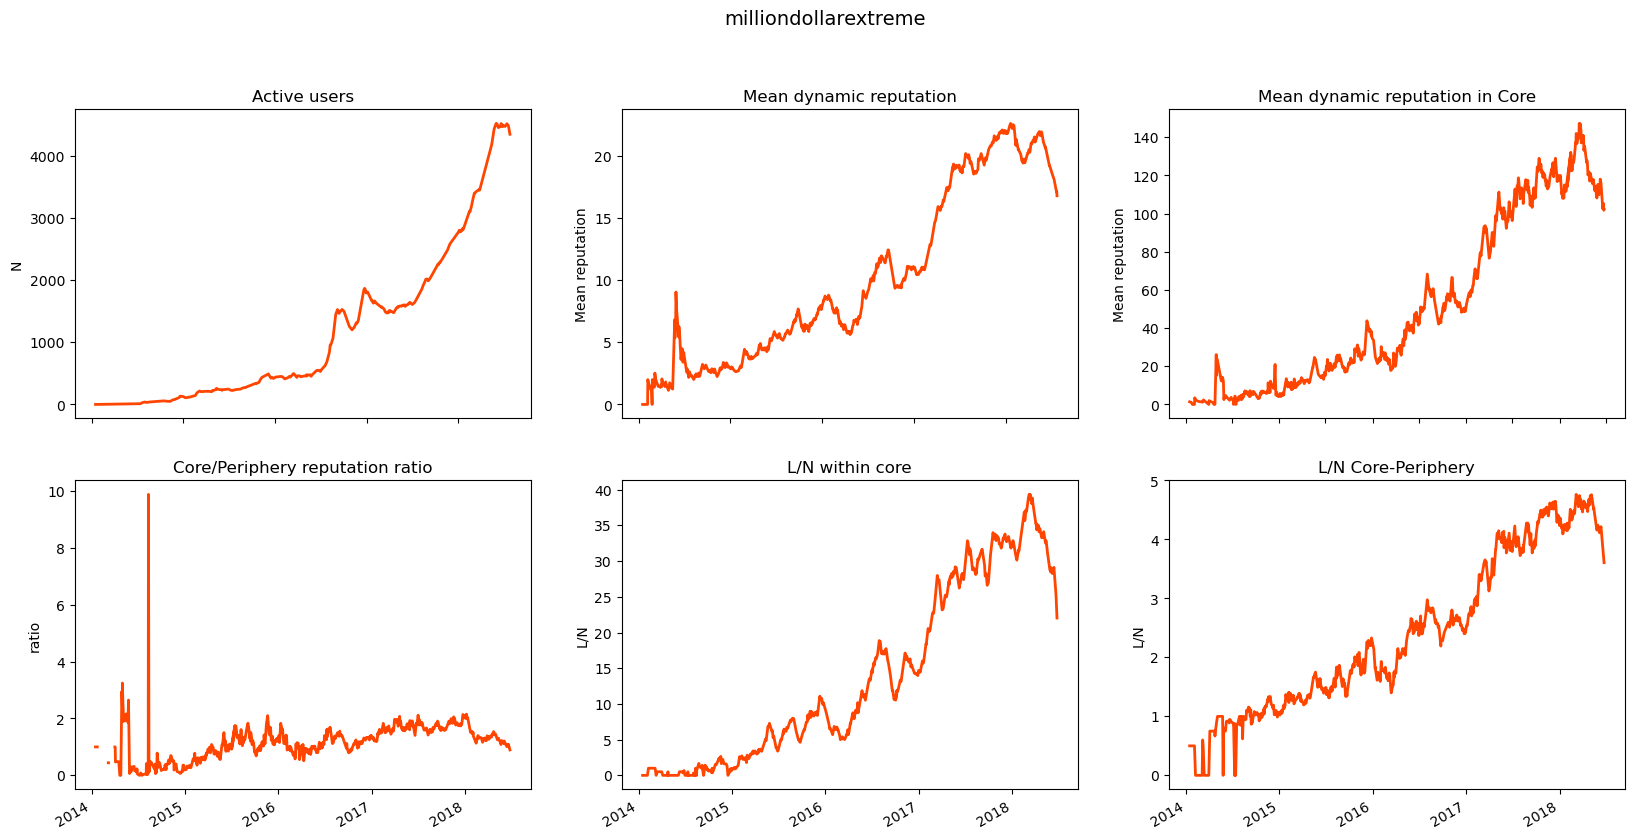

In [140]:
plot_reddit_data('milliondollarextreme')

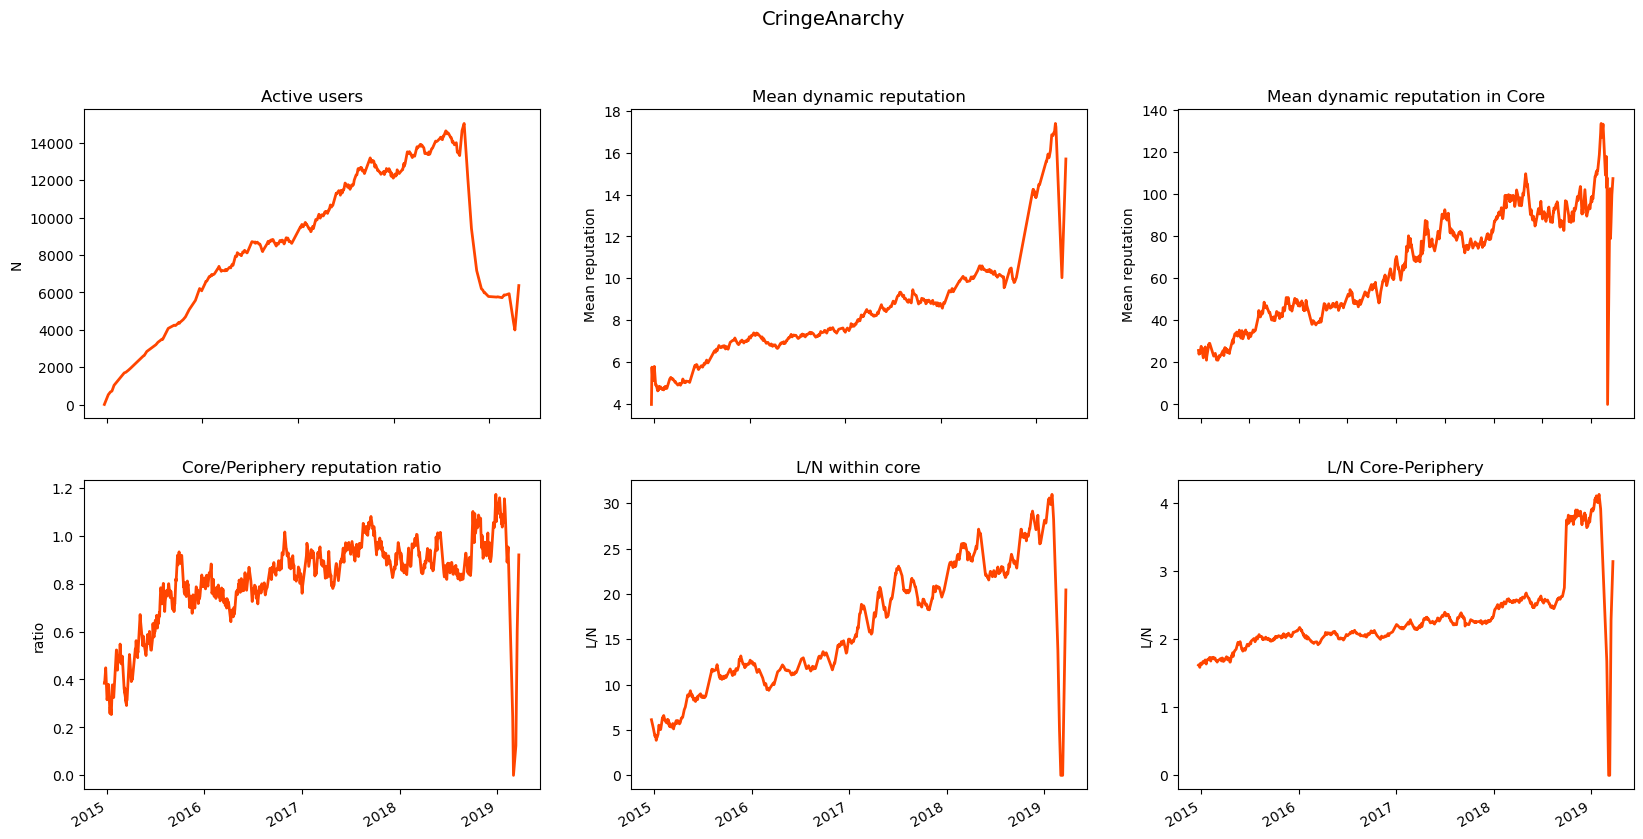

In [141]:
plot_reddit_data('CringeAnarchy')

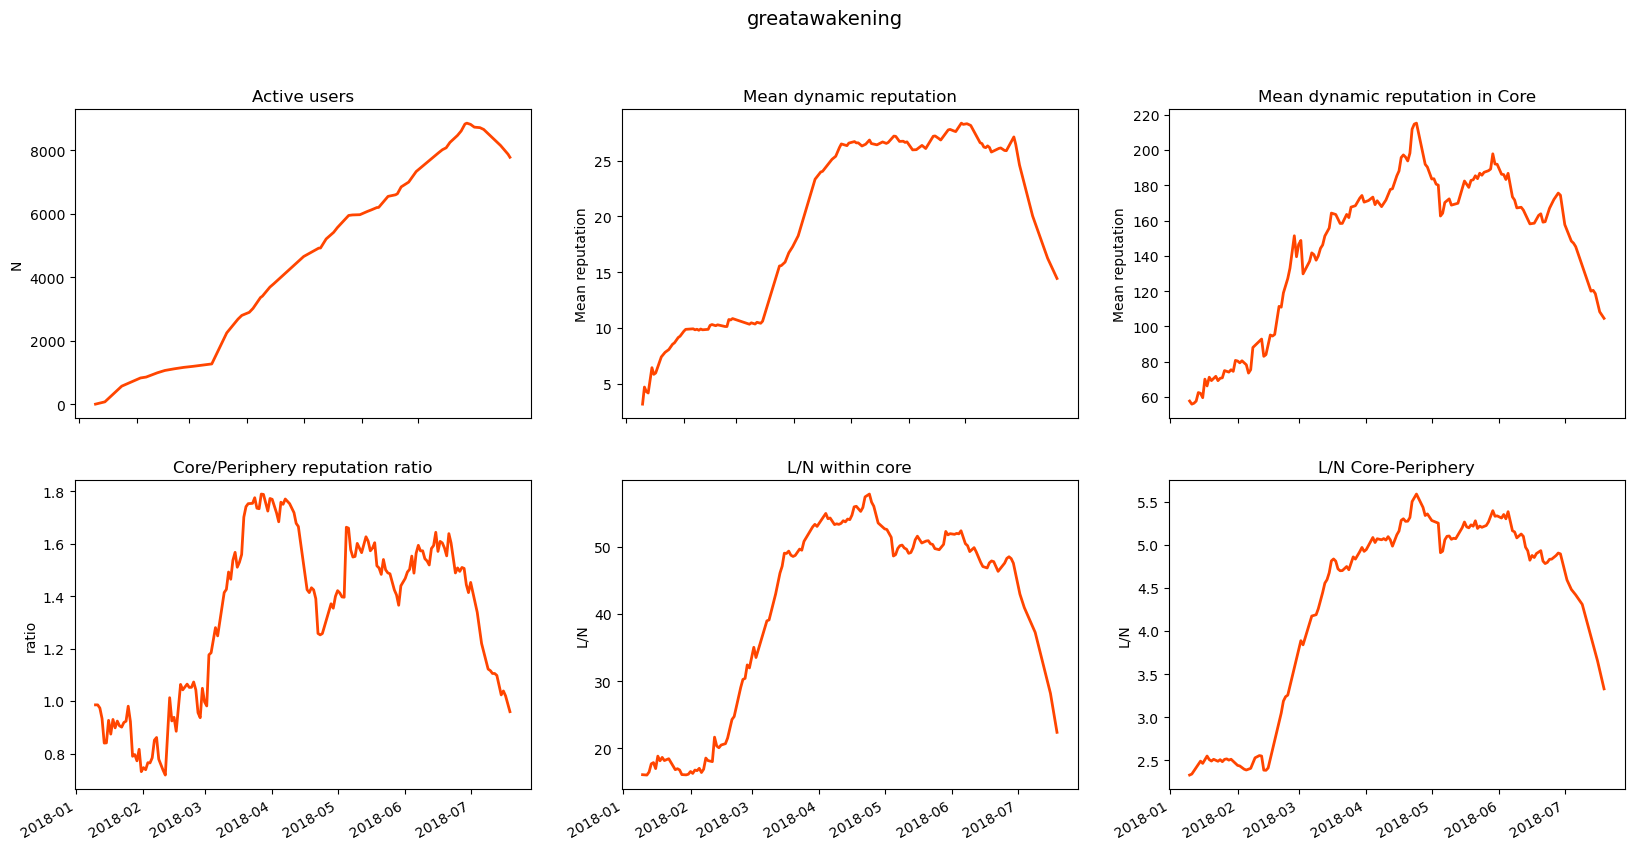

In [144]:
plot_reddit_data('greatawakening')

## Voat-Reddit 

### milliondollarextreme

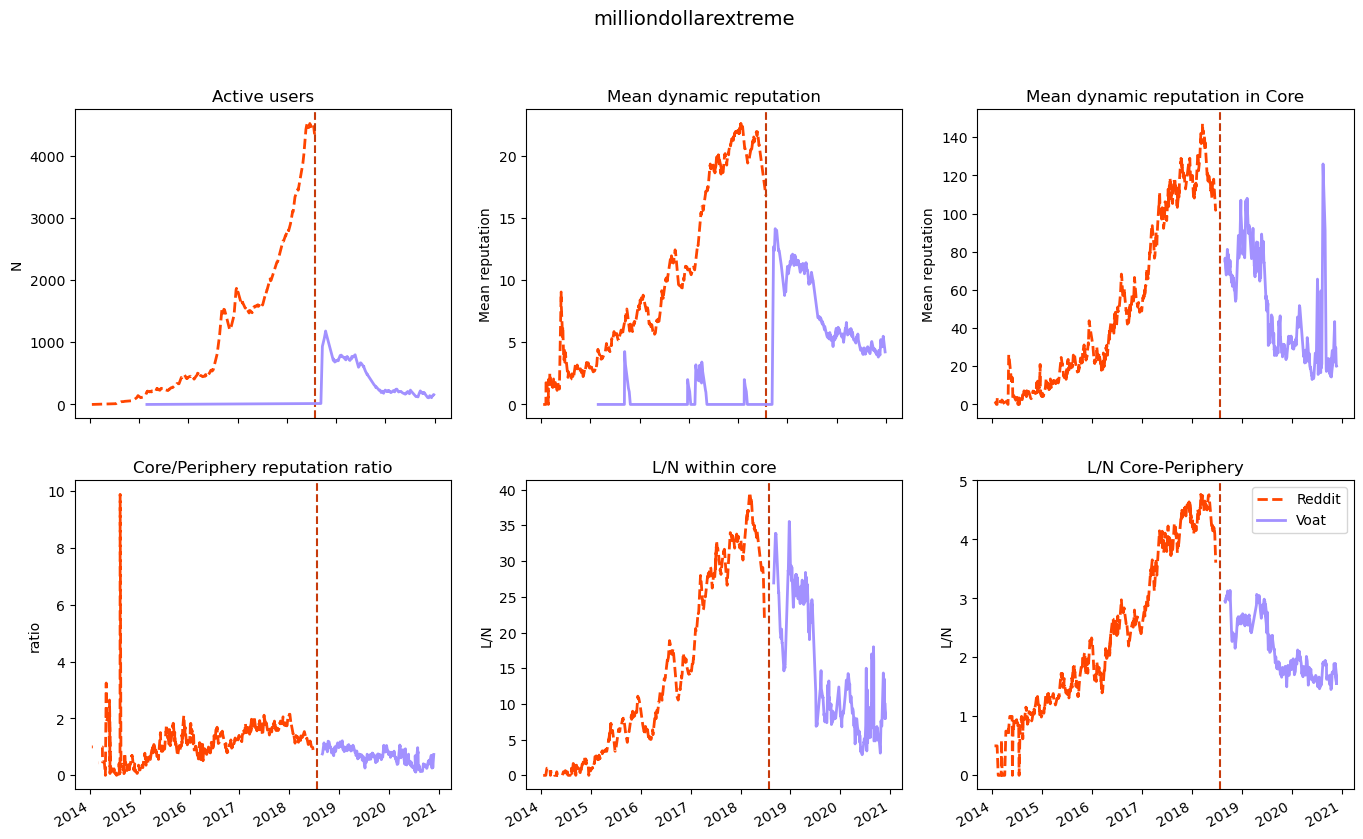

In [119]:
plot_communities('milliondollarextreme','milliondollarextreme')

### CringeAnarchy

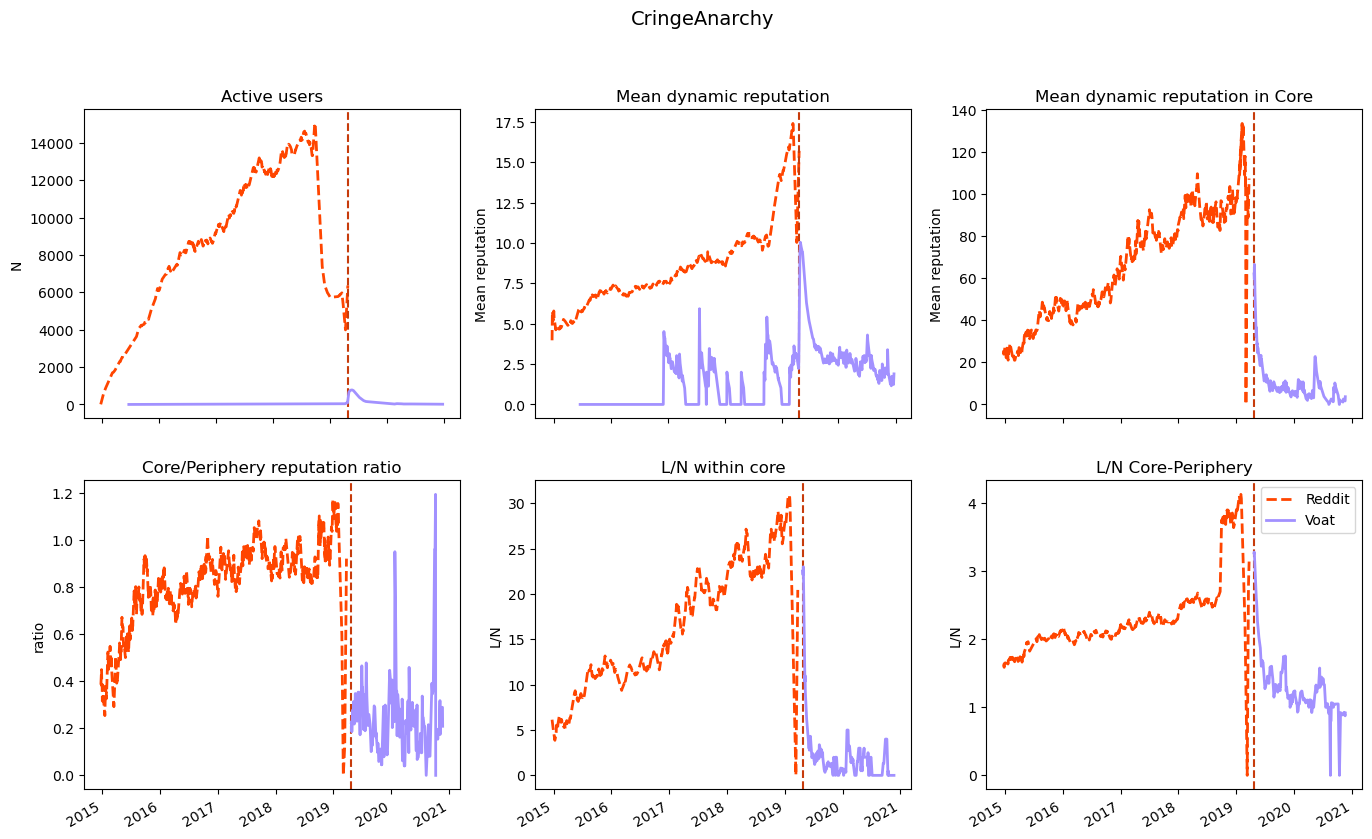

In [117]:
plot_communities('CringeAnarchy','CringeAnarchy')

### greatawakening

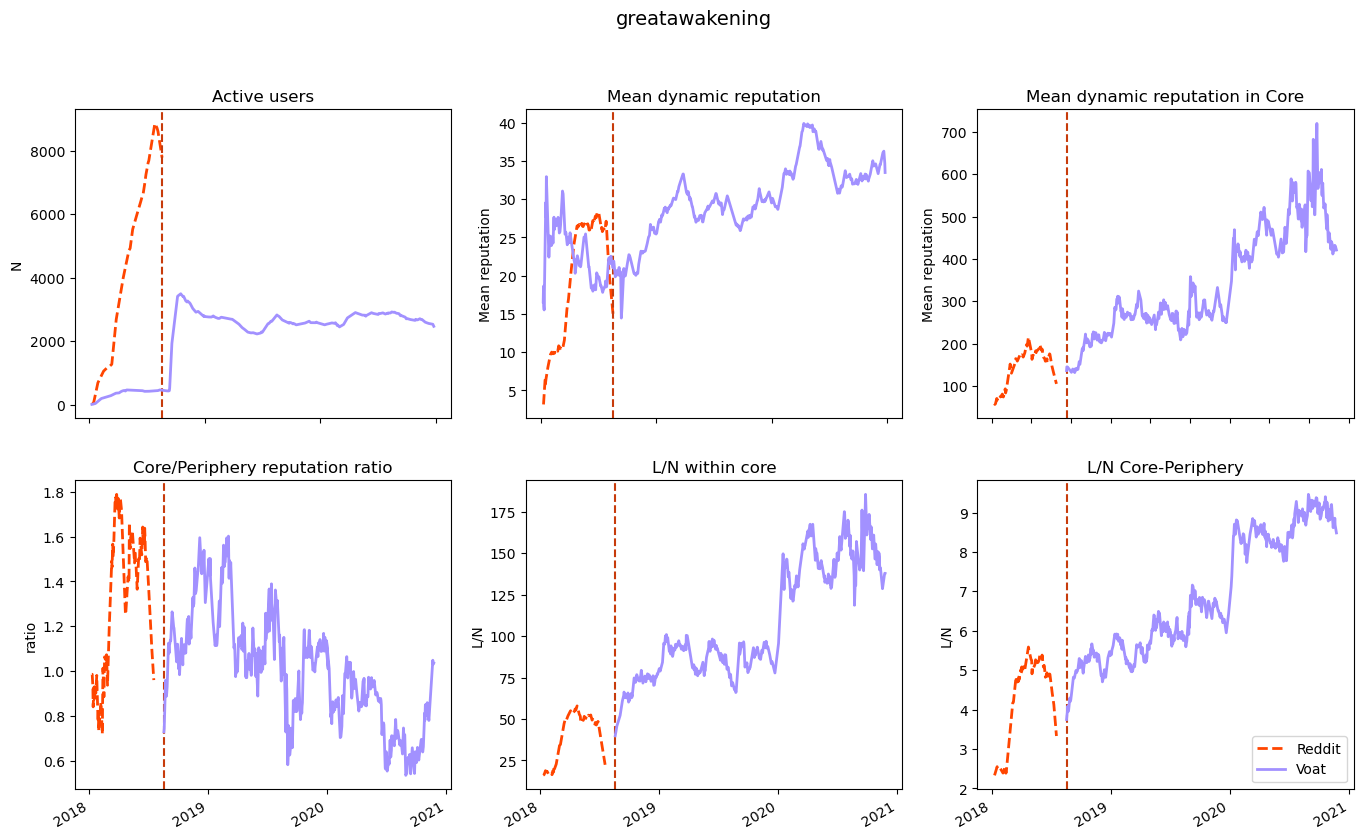

In [118]:
plot_communities('greatawakening','GreatAwakening')